## Косинского Никиты 

### 8 группа

### Лабараторная работа 2
### Преподаватель: Полузеров Тимофей Дмитриевич

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Annual 2005-2011.csv")
print("Размер данных:", df.shape)

Размер данных: (2695, 22)


### Основные статистики после стандартизации

In [76]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
cols_for_analysis = numeric_cols
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_for_analysis]), 
                        columns=cols_for_analysis, index=df.index)

display(df_scaled.describe())

,empl_num,k1,k2,k3,k4,k5,k6,k7,k8,k9,...,k12,k13,k14,k15,k16,k17,k18,k19,k20,year
count,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,...,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2695.000000,2.695000e+03,2.695000e+03,2.695000e+03,2.695000e+03,2695.000000
mean,-1.516000e-17,5.273044e-17,-2.636522e-17,1.054609e-17,-1.186435e-17,-2.478331e-16,-7.909567e-17,-6.854958e-17,-2.161948e-16,-1.338035e-16,...,1.265531e-16,2.636522e-17,8.700523e-17,-8.436871e-17,0.000000,-1.581913e-17,2.109218e-17,3.691131e-17,1.080974e-16,0.000000
std,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,...,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186,1.000186e+00,1.000186e+00,1.000186e+00,1.000186e+00,1.000186
min,-4.737110e-01,-1.037892e+00,-4.598487e-01,-8.896087e-01,-7.372322e+00,-1.699168e+00,-1.117230e+00,-7.804359e-01,-3.076549e+00,-8.566636e-01,...,-1.879931e+00,-1.668565e+00,-1.273656e+00,-9.832092e-01,-0.763248,-8.886515e-02,-9.306805e+00,-4.261086e+00,-1.864077e+01,-1.500000
25%,-3.878324e-01,-5.350524e-01,-4.268354e-01,-5.526766e-01,-3.511647e-01,-8.140866e-01,-8.218504e-01,-7.756304e-01,-6.830136e-01,-5.379941e-01,...,-4.691536e-01,-7.553648e-01,-7.002256e-01,-5.622753e-01,-0.502567,-8.461179e-02,-2.816703e-01,-6.591115e-01,-4.152797e-01,-1.000000
50%,-2.925638e-01,-3.126103e-01,-3.525239e-01,-3.123213e-01,1.767977e-01,-1.334687e-01,-2.480376e-01,-4.414239e-01,1.324537e-01,-2.649018e-01,...,-2.863603e-01,-1.361230e-01,-2.324249e-01,-2.730051e-01,-0.324598,-8.017001e-02,4.058634e-02,-2.466812e-01,-1.432438e-01,0.000000
75%,-3.610162e-02,1.397512e-01,-5.116056e-02,1.266434e-01,6.144968e-01,6.738908e-01,5.780298e-01,4.236145e-01,8.238722e-01,1.740734e-01,...,8.318569e-03,5.566130e-01,4.417130e-01,2.381126e-01,0.083373,-6.740381e-02,4.418312e-01,4.666543e-01,3.680571e-01,1.000000
max,1.073159e+01,9.479610e+00,1.312036e+01,1.128675e+01,1.436423e+00,3.724643e+00,3.576410e+00,3.699366e+00,1.706832e+00,2.426950e+01,...,1.586018e+01,5.400768e+00,7.712946e+00,1.356603e+01,10.441009,4.599464e+01,7.281311e+00,5.914060e+00,5.255777e+00,1.500000


### Анализ целесообразности факторного анализа

In [77]:
# ЗАДАНИЕ 1
# Критерий сферичности Бартлетта
chi_square, p_value = calculate_bartlett_sphericity(df_scaled)
print(f"Критерий сферичности Бартлетта:")
print(f"Статистика χ²: {chi_square:.3f}")
print(f"p-значение: {p_value:.6f}")
if p_value < 0.05:
    print("Корреляционная матрица не является единичной")
    print("Факторный анализ целесообразен")
else:
    print("Факторный анализ не целесообразен")
# Статистика Кайзера-Мейера-Олкина (KMO)
kmo_all, kmo_model = calculate_kmo(df_scaled)
print(f"Статистика Кайзера-Мейера-Олкина (KMO): {kmo_model:.3f}")
if kmo_model >= 0.8:
    print("Отличное качество выборки для факторного анализа")
elif kmo_model >= 0.7:
    print("Хорошее качество выборки для факторного анализа") 
elif kmo_model >= 0.6:
    print("Приемлемое качество выборки для факторного анализа")
elif kmo_model >= 0.5:
    print("Посредственное качество выборки для факторного анализа")
else:
    print("Неприемлемое качество выборки для факторного анализа")

Критерий сферичности Бартлетта:
Статистика χ²: 40874.337
p-значение: 0.000000
Корреляционная матрица не является единичной
Факторный анализ целесообразен
Статистика Кайзера-Мейера-Олкина (KMO): 0.748
Хорошее качество выборки для факторного анализа


### Определение оптимального числа факторов

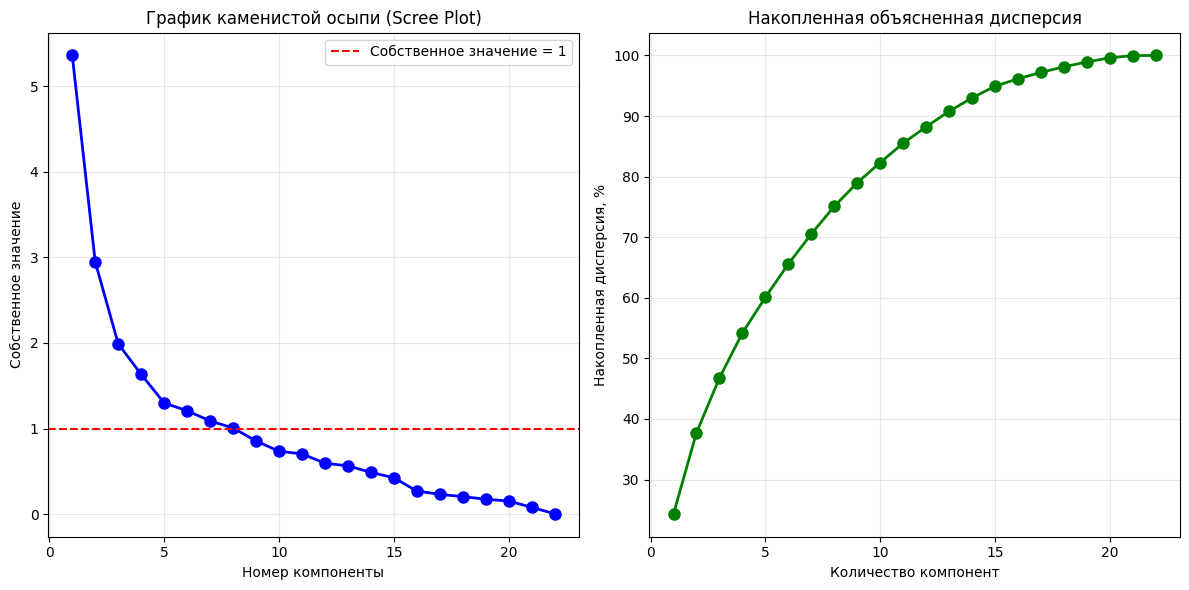

Метод Кайзера (собственные значения > 1): 8 компонент
Для объяснения 70% дисперсии требуется: 7 компонент


In [88]:
# Метод Кайзера (собственные значения > 1)
pca = PCA()
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'bo-', linewidth=2, markersize=8)
plt.axhline(y=1, color='r', linestyle='--', label='Собственное значение = 1')
plt.xlabel('Номер компоненты')
plt.ylabel('Собственное значение')
plt.title('График каменистой осыпи (Scree Plot)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance * 100, 'go-', linewidth=2, markersize=8)
plt.xlabel('Количество компонент')
plt.ylabel('Накопленная дисперсия, %')
plt.title('Накопленная объясненная дисперсия')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
n_components_kaiser = sum(eigenvalues > 1)
print(f"Метод Кайзера (собственные значения > 1): {n_components_kaiser} компонент")

for i, (ev, cum_ev) in enumerate(zip(explained_variance_ratio, cumulative_variance)):
    if cum_ev >= 0.7: 
        n_components_70 = i + 1
        print(f"Для объяснения 70% дисперсии требуется: {n_components_70} компонент")
        break

n_factors = n_components_kaiser

### Факторный анализ и определение значимых коэффициентов

In [89]:
# ЗАДАНИЕ 2
fa = FactorAnalyzer(n_factors=n_factors, rotation='varimax', method='principal')
fa.fit(df_scaled)
eigenvalues_fa = fa.get_eigenvalues()[0]
variance_fa = fa.get_factor_variance()
variance_df = pd.DataFrame({
    'Номер фактора': range(1, n_factors + 1),
    'Собственные значения': eigenvalues_fa[:n_factors],
    '% объясненной дисперсии': variance_fa[1],
    'Кумулятивный % объясненной дисперсии': variance_fa[2]
})
print("Собственные значения и объясненная дисперсия:")
display(variance_df)
total_variance_explained = variance_fa[2][-1]
print(f"Общая объясненная дисперсия: {total_variance_explained:.3f} ({total_variance_explained*100:.1f}%)")

Собственные значения и объясненная дисперсия:


,Номер фактора,Собственные значения,% объясненной дисперсии,Кумулятивный % объясненной дисперсии
0,1,5.357120,0.147757,0.147757
1,2,2.945516,0.144125,0.291882
2,3,1.989549,0.072352,0.364234
3,4,1.631975,0.081137,0.445371
4,5,1.298457,0.124238,0.569609
5,6,1.207075,0.066837,0.636446
6,7,1.088523,0.068214,0.704660
7,8,1.005888,0.046436,0.751096


Общая объясненная дисперсия: 0.751 (75.1%)


### Факторные нагрузки после вращения (Varimax)

In [104]:
loadings = fa.loadings_
loadings_df = pd.DataFrame(loadings, 
                          index=cols_for_analysis,
                          columns=[f'F{i+1}' for i in range(n_factors)])

loadings_display = loadings_df.round(3)
#|loading| > 0.4
styled_loadings = loadings_display.style.applymap(
    lambda x: 'background-color: yellow' if abs(x) >= 0.4 else ''
)
display(styled_loadings)
communalities = fa.get_communalities()
communalities_df = pd.DataFrame({
    'Переменная': cols_for_analysis,
    'Коммунальность': communalities
}).sort_values('Коммунальность', ascending=False)

,F1,F2,F3,F4,F5,F6,F7,F8
empl_num,0.011000,0.038000,-0.170000,-0.148000,0.043000,0.584000,-0.401000,0.242000
k1,0.895000,0.149000,-0.082000,0.015000,0.189000,0.063000,0.100000,-0.014000
k2,0.878000,0.164000,0.111000,0.029000,0.054000,0.059000,-0.025000,0.020000
k3,0.916000,0.171000,-0.137000,0.042000,0.110000,0.052000,0.061000,0.016000
k4,0.295000,0.625000,-0.159000,-0.181000,0.396000,-0.018000,0.042000,-0.030000
k5,-0.245000,-0.224000,-0.065000,0.071000,-0.908000,-0.010000,0.021000,-0.020000
k6,-0.053000,-0.125000,-0.065000,-0.145000,0.040000,-0.774000,-0.075000,0.042000
k7,-0.149000,-0.231000,-0.034000,-0.078000,-0.076000,-0.614000,-0.311000,0.109000
k8,0.241000,0.222000,0.069000,-0.078000,0.911000,0.006000,-0.024000,0.020000
k9,0.547000,-0.214000,-0.158000,0.068000,0.527000,0.071000,0.198000,-0.038000


### Визуализация факторных нагрузок

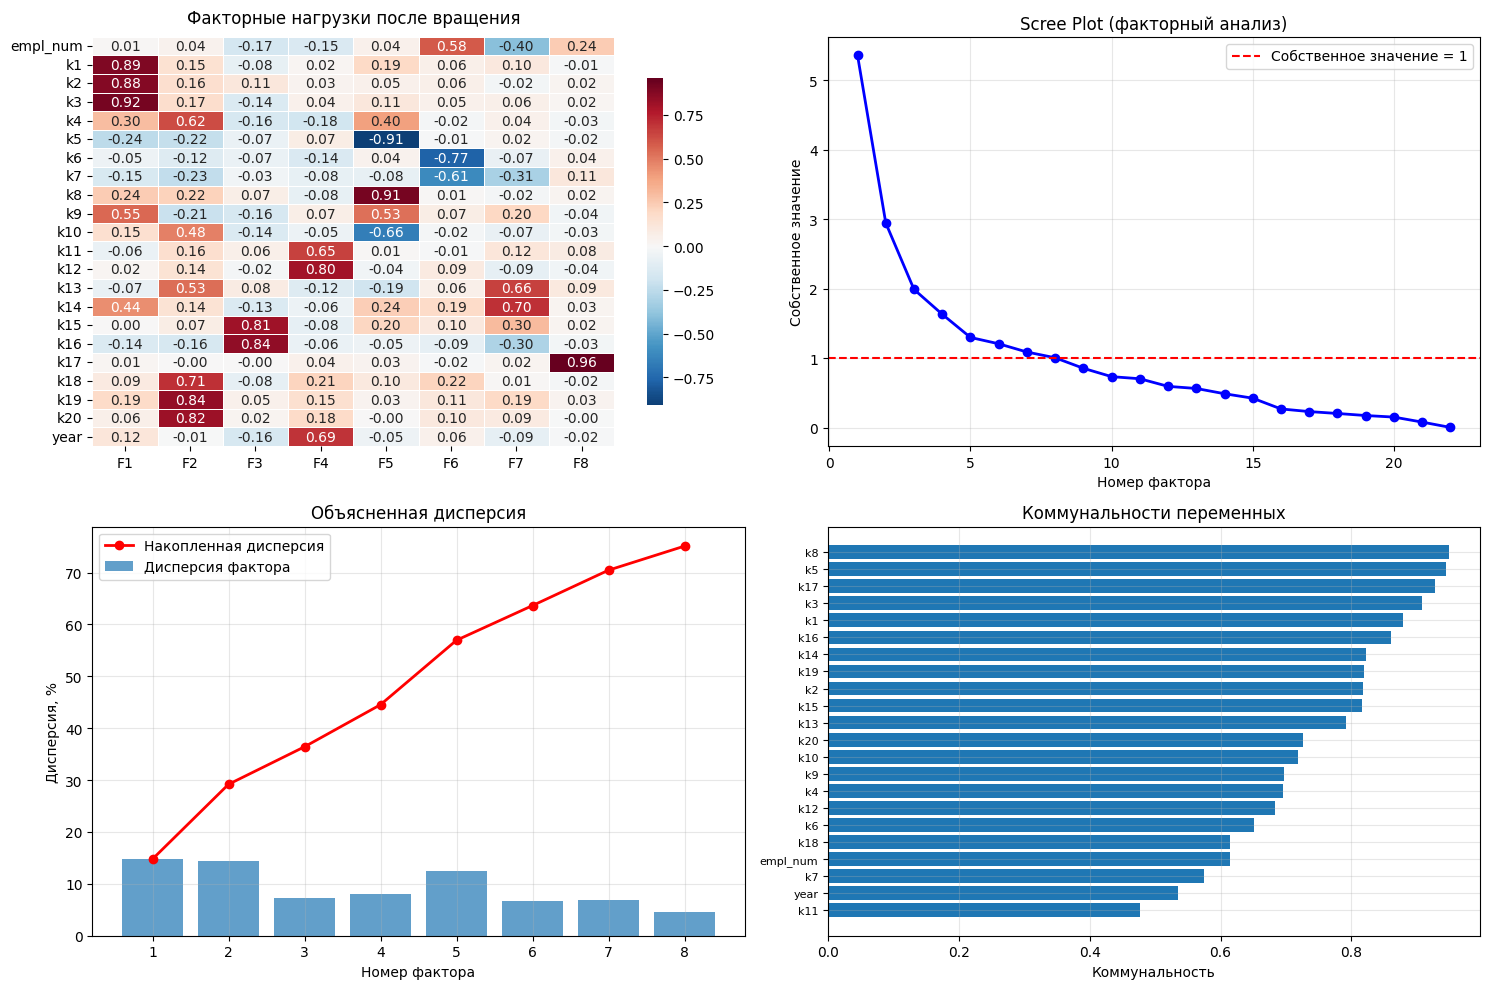

In [105]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.heatmap(loadings_df, annot=True, cmap='RdBu_r', center=0, 
            fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Факторные нагрузки после вращения', fontsize=12, pad=10)
plt.subplot(2, 2, 2)
plt.plot(range(1, len(eigenvalues_fa) + 1), eigenvalues_fa, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=1, color='r', linestyle='--', label='Собственное значение = 1')
plt.xlabel('Номер фактора')
plt.ylabel('Собственное значение')
plt.title('Scree Plot (факторный анализ)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 3)
factors_range = range(1, n_factors + 1)
plt.bar(factors_range, variance_fa[1] * 100, alpha=0.7, label='Дисперсия фактора')
plt.plot(factors_range, variance_fa[2] * 100, 'ro-', linewidth=2, markersize=6, label='Накопленная дисперсия')
plt.xlabel('Номер фактора')
plt.ylabel('Дисперсия, %')
plt.title('Объясненная дисперсия')
plt.legend()
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 4)
sorted_comm = communalities_df.sort_values('Коммунальность', ascending=True)
plt.barh(range(len(sorted_comm)), sorted_comm['Коммунальность'])
plt.yticks(range(len(sorted_comm)), sorted_comm['Переменная'], fontsize=8)
plt.xlabel('Коммунальность')
plt.title('Коммунальности переменных')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Интерпретация факторов

In [106]:
significant_vars_per_factor = {}
for factor in loadings_df.columns:
    factor_loadings = loadings_df[factor]
    significant_vars = factor_loadings[abs(factor_loadings) > 0.4]
    significant_vars = significant_vars.sort_values(key=abs, ascending=False)
    significant_vars_per_factor[factor] = significant_vars
    print(f"\n{factor} (объясняет {variance_fa[1][int(factor[-1])-1]*100:.1f}% дисперсии):")
    for var, loading in significant_vars.items():
        direction = "положительная" if loading > 0 else "отрицательная"
        print(f"  {var}: {loading:.3f} ({direction} связь)")
    
    vars_list = significant_vars.index.tolist()
    print(f"  Основные переменные: {', '.join(vars_list)}")


F1 (объясняет 14.8% дисперсии):
  k3: 0.916 (положительная связь)
  k1: 0.895 (положительная связь)
  k2: 0.878 (положительная связь)
  k9: 0.547 (положительная связь)
  k14: 0.445 (положительная связь)
  Основные переменные: k3, k1, k2, k9, k14

F2 (объясняет 14.4% дисперсии):
  k19: 0.842 (положительная связь)
  k20: 0.818 (положительная связь)
  k18: 0.706 (положительная связь)
  k4: 0.625 (положительная связь)
  k13: 0.534 (положительная связь)
  k10: 0.480 (положительная связь)
  Основные переменные: k19, k20, k18, k4, k13, k10

F3 (объясняет 7.2% дисперсии):
  k16: 0.845 (положительная связь)
  k15: 0.815 (положительная связь)
  Основные переменные: k16, k15

F4 (объясняет 8.1% дисперсии):
  k12: 0.803 (положительная связь)
  year: 0.694 (положительная связь)
  k11: 0.649 (положительная связь)
  Основные переменные: k12, year, k11

F5 (объясняет 12.4% дисперсии):
  k8: 0.911 (положительная связь)
  k5: -0.908 (отрицательная связь)
  k10: -0.660 (отрицательная связь)
  k9: 0.527 

### Расчет интегрального показателя кредитоспособности

In [107]:
# ЗАДАНИЕ 3
factor_scores = fa.transform(df_scaled)
factor_scores_df = pd.DataFrame(factor_scores, 
                               columns=[f'F{i+1}_score' for i in range(n_factors)],
                               index=df.index)

# Веса факторов (доли объясненной дисперсии)
factor_weights = variance_fa[1] / total_variance_explained
print("Веса факторов для интегрального показателя:")
weights_df = pd.DataFrame({
    'Фактор': [f'F{i+1}' for i in range(n_factors)],
    'Доля дисперсии': variance_fa[1],
    'Вес в интегральном показателе': factor_weights
})
display(weights_df)
# Расчет интегрального показателя кредитоспособности
integral_score = np.zeros(len(df_scaled))
for i in range(n_factors):
    integral_score += factor_scores[:, i] * factor_weights[i]
integral_score_normalized = (integral_score - integral_score.min()) / (integral_score.max() - integral_score.min())
results_df = df.copy()
results_df['Integral_Score'] = integral_score
results_df['Integral_Score_Normalized'] = integral_score_normalized
results_df = pd.concat([results_df, factor_scores_df], axis=1)
print("\nИнтегральный показатель кредитоспособности:")
print(f"Минимум: {integral_score.min():.3f}")
print(f"Максимум: {integral_score.max():.3f}")
print(f"Среднее: {integral_score.mean():.3f}")
print(f"Стандартное отклонение: {integral_score.std():.3f}")
print(f"\nНормированный показатель [0, 1]:")
print(f"Минимум: {integral_score_normalized.min():.3f}")
print(f"Максимум: {integral_score_normalized.max():.3f}")
print(f"Среднее: {integral_score_normalized.mean():.3f}")

Веса факторов для интегрального показателя:


,Фактор,Доля дисперсии,Вес в интегральном показателе
0,F1,0.147757,0.196722
1,F2,0.144125,0.191887
2,F3,0.072352,0.096329
3,F4,0.081137,0.108024
4,F5,0.124238,0.165409
5,F6,0.066837,0.088986
6,F7,0.068214,0.090819
7,F8,0.046436,0.061824



Интегральный показатель кредитоспособности:
Минимум: -1.798
Максимум: 3.052
Среднее: 0.000
Стандартное отклонение: 0.379

Нормированный показатель [0, 1]:
Минимум: 0.000
Максимум: 1.000
Среднее: 0.371


### Визуализация результатов

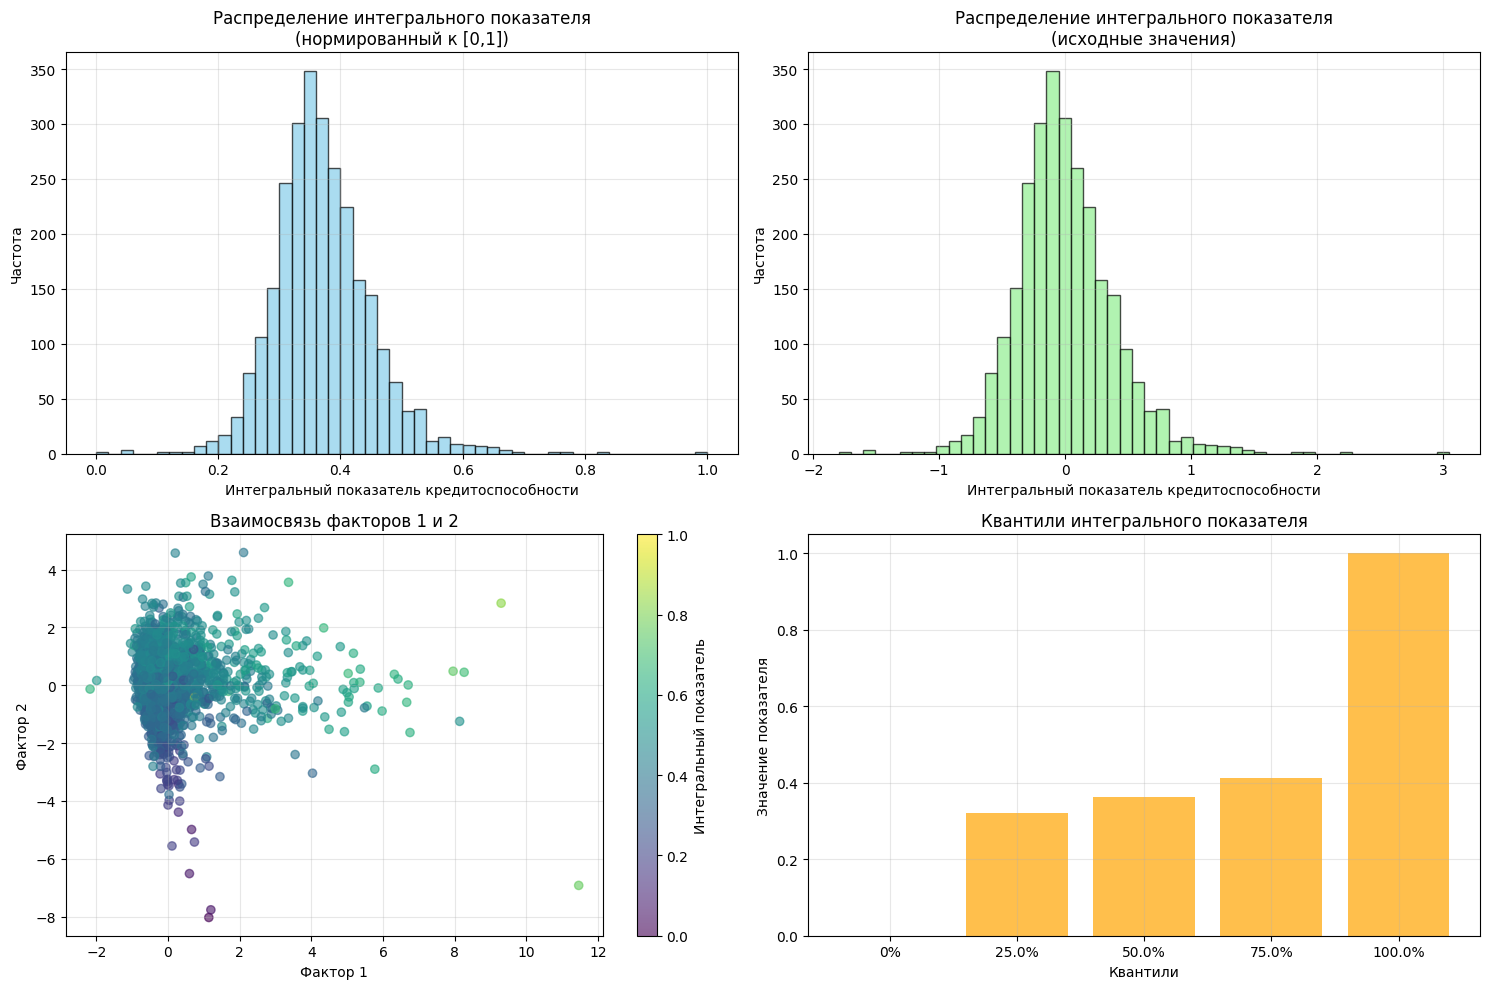

In [108]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.hist(integral_score_normalized, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Интегральный показатель кредитоспособности')
plt.ylabel('Частота')
plt.title('Распределение интегрального показателя\n(нормированный к [0,1])')
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 2)
plt.hist(integral_score, bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Интегральный показатель кредитоспособности')
plt.ylabel('Частота')
plt.title('Распределение интегрального показателя\n(исходные значения)')
plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 3)
if n_factors >= 2:
    plt.scatter(factor_scores[:, 0], factor_scores[:, 1], alpha=0.6, c=integral_score_normalized, cmap='viridis')
    plt.colorbar(label='Интегральный показатель')
    plt.xlabel('Фактор 1')
    plt.ylabel('Фактор 2')
    plt.title('Взаимосвязь факторов 1 и 2')
    plt.grid(True, alpha=0.3)
plt.subplot(2, 2, 4)
quantiles = [0, 0.25, 0.5, 0.75, 1.0]
quantile_values = np.quantile(integral_score_normalized, quantiles)
plt.bar(range(len(quantiles)), quantile_values, alpha=0.7, color='orange')
plt.xticks(range(len(quantiles)), [f'{q*100}%' for q in quantiles])
plt.xlabel('Квантили')
plt.ylabel('Значение показателя')
plt.title('Квантили интегрального показателя')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Анализ предприятий по уровням кредитоспособности

In [109]:
quantiles = np.quantile(integral_score_normalized, [0.25, 0.5, 0.75])
credit_groups = pd.cut(integral_score_normalized, 
                      bins=[-0.1, quantiles[0], quantiles[1], quantiles[2], 1.1],
                      labels=['Низкий', 'Ниже среднего', 'Выше среднего', 'Высокий'])

results_df['Credit_Group'] = credit_groups
group_stats = results_df.groupby('Credit_Group')['Integral_Score_Normalized'].agg([
    'count', 'mean', 'std', 'min', 'max', 'median'
]).round(4)
print("Статистика интегрального показателя по группам кредитоспособности:")
display(group_stats)

group_counts = results_df['Credit_Group'].value_counts().sort_index()
group_percents = results_df['Credit_Group'].value_counts(normalize=True).sort_index() * 100

Статистика интегрального показателя по группам кредитоспособности:


,count,mean,std,min,max,median
Credit_Group,,,,,,
Низкий,674,0.2816,0.0382,0.0000,0.3215,0.2920
Ниже среднего,674,0.3433,0.0117,0.3217,0.3627,0.3436
Выше среднего,673,0.3863,0.0148,0.3628,0.4130,0.3857
Высокий,674,0.4717,0.0591,0.4131,1.0000,0.4561


### Визуализация групп кредитоспособности

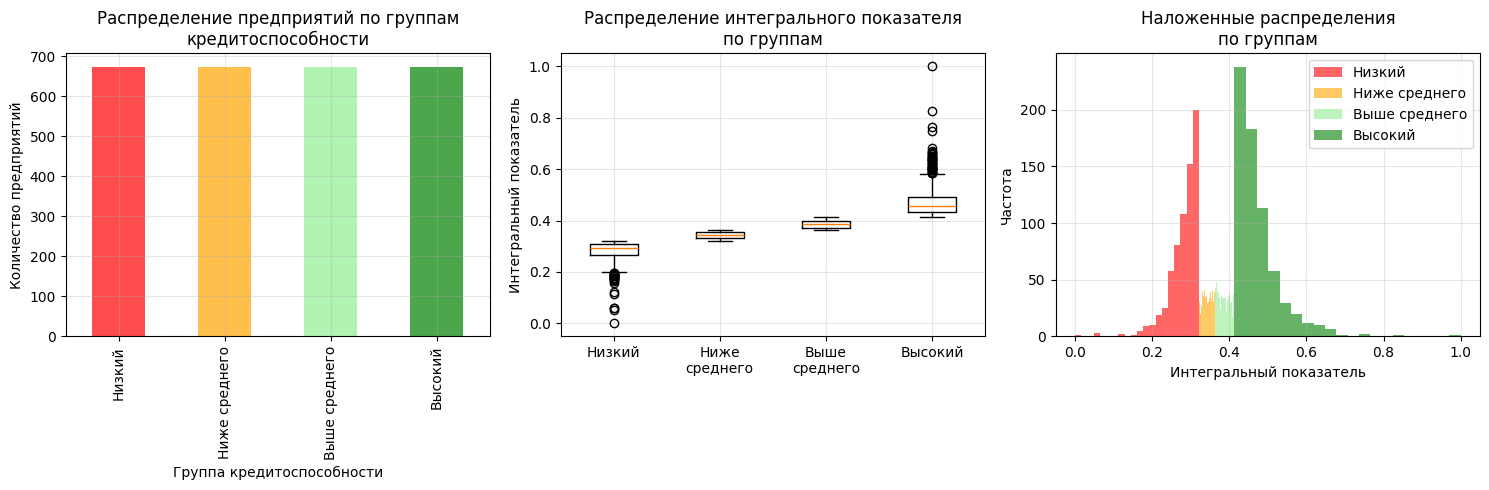

In [110]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
group_counts.plot(kind='bar', color=['red', 'orange', 'lightgreen', 'green'], alpha=0.7)
plt.title('Распределение предприятий по группам\nкредитоспособности')
plt.xlabel('Группа кредитоспособности')
plt.ylabel('Количество предприятий')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 2)
group_data = [results_df[results_df['Credit_Group'] == group]['Integral_Score_Normalized'] 
             for group in ['Низкий', 'Ниже среднего', 'Выше среднего', 'Высокий']]
plt.boxplot(group_data, labels=['Низкий', 'Ниже\nсреднего', 'Выше\nсреднего', 'Высокий'])
plt.title('Распределение интегрального показателя\nпо группам')
plt.ylabel('Интегральный показатель')
plt.grid(True, alpha=0.3)
plt.subplot(1, 3, 3)
colors = {'Низкий': 'red', 'Ниже среднего': 'orange', 
          'Выше среднего': 'lightgreen', 'Высокий': 'green'}
for group in ['Низкий', 'Ниже среднего', 'Выше среднего', 'Высокий']:
    group_data = results_df[results_df['Credit_Group'] == group]['Integral_Score_Normalized']
    plt.hist(group_data, bins=20, alpha=0.6, label=group, color=colors[group])
plt.xlabel('Интегральный показатель')
plt.ylabel('Частота')
plt.title('Наложенные распределения\nпо группам')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Сводка результатов факторного анализа

In [111]:
summary_df = pd.DataFrame({
    'Метрика': [
        'Число наблюдений',
        'Число переменных', 
        'KMO статистика',
        'p-значение Бартлетта',
        'Число выделенных факторов',
        'Общая объясненная дисперсия, %',
        'Минимальный интегральный показатель',
        'Максимальный интегральный показатель',
        'Средний интегральный показатель'
    ],
    'Значение': [
        len(results_df),
        len(cols_for_analysis),
        f"{kmo_model:.3f}",
        f"{p_value:.6f}",
        n_factors,
        f"{total_variance_explained*100:.1f}%",
        f"{integral_score.min():.3f}",
        f"{integral_score.max():.3f}", 
        f"{integral_score.mean():.3f}"
    ]
})
display(summary_df)

,Метрика,Значение
0,Число наблюдений,2695
1,Число переменных,22
2,KMO статистика,0.748
3,p-значение Бартлетта,0.000000
4,Число выделенных факторов,8
5,"Общая объясненная дисперсия, %",75.1%
6,Минимальный интегральный показатель,-1.798
7,Максимальный интегральный показатель,3.052
8,Средний интегральный показатель,0.000
